<a href="https://colab.research.google.com/github/shaffy-dev/Online-News-Popularity-Prediction/blob/main/Regression%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##
## Big Data Mining Techniques and Implementation
##


### A1 - Task 2: Regression Analysis on the Online News Popularity Dataset
###
### By Shaff Bin Imran (7673899)
###
##### We aim to build an end‑to‑end regression pipeline to predict how many times an article is shared (`shares`) using the Online News Popularity dataset
###

In [ ]:
import pandas as pd    # For loading and manipulating tabular data
import numpy as np     # For numerical operations and array handling
import matplotlib.pyplot as plt  # For creating basic plots
import seaborn as sns  # For enhanced statistical visualizations
from sklearn.preprocessing import StandardScaler  # To standardize features (mean=0, std=1)
from sklearn.preprocessing import MinMaxScaler    # To scale features into a 0–1 range


###
### 1 - Data Exploration and visualization
###
##### Load the dataset, inspect its structure, and identify feature relevance via correlation with the target. We will then:
1. Compute summary statistics and plot distributions.
2. Visualize correlations using heatmaps.
3. Compare Pearson |r| values with a bar chart.
4. Examine representative scatter plots.


In [ ]:

file_path = "/Users/shaffimran/desktop/semester 5/csci316/assignments/assignment 1/a1/datasets/OnlineNewsPopularity.csv"   #loading the dataset
df = pd.read_csv(file_path)

In [ ]:
df.head()    #shows the first five rows

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
# Display the dimensions of the DataFrame (rows, columns)
print("Shape:", df.shape)

# Show how many columns of each data type we have
print("\nColumn dtypes:\n", df.dtypes.value_counts())


Shape: (39644, 61)

Column dtypes:
 float64    59
object      1
int64       1
Name: count, dtype: int64


In [ ]:
# Count total missing entries in the DataFrame
total_missing = df.isna().sum().sum()
print("\nTotal missing values in entire frame:", total_missing)

if total_missing:
    # If any missing data exists, list columns and their missing counts
    print("\nMissing values by column:")
    print(df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False))
else:
    # Othewise, indicate that the dataset is complete
    print("\nNo missing values detected.")



Total missing values in entire frame: 0

No missing values detected.


##
**Missing Values Check:**

We calculated the total number of missing entries in the entire DataFrame and found zero. This tells us every cell in our dataset is populated, so we don’t need to perform any imputation or drop rows due to missing data. It simplifies our preprocessing since we can work directly with all available records.
##

In [ ]:
# Clean up column names by stripping any extra spaces
df.columns = df.columns.str.strip()

# Confirm our target column 'shares' exists in the DataFrame
print("Target column detected as:", "shares" in df.columns)

# Compute Pearson correlations between each numeric feature and 'shares'
corr_with_target = (
    df.corr(numeric_only=True)["shares"]   # take only numeric columns
      .drop("shares")                     # remove self-correlation
      .sort_values(ascending=False)       # sort from strongest positive to weakest
)

# Show the top 10 features most strongly linearly associated with the target
print("\nTop 10 absolute correlations with 'shares':")
display(
    corr_with_target
      .reindex(corr_with_target.abs().sort_values(ascending=False).index)[:10]
)


Target column detected as: True

Top 10 absolute correlations with 'shares':


kw_avg_avg                    0.110413
LDA_03                        0.083771
kw_max_avg                    0.064306
LDA_02                       -0.059163
self_reference_avg_sharess    0.057789
self_reference_min_shares     0.055958
data_channel_is_world        -0.049497
self_reference_max_shares     0.047115
num_hrefs                     0.045404
kw_avg_max                    0.044686
Name: shares, dtype: float64

##
**Column Name Cleanup & Initial Correlation Scan:**

We removed any leading or trailing spaces from column names to avoid referencing errors. Then we verified that our target column, shares, is present. Next, we computed Pearson correlations between every numeric feature and shares, dropping the self‑correlation. The top ten absolute correlations range from about 0.11 down to 0.04, indicating weak but non‑zero linear relationships worth exploring further.
##

In [ ]:
# Remove extra spaces around column names
df.columns = df.columns.str.strip()

# Split dataframe into predictors (X) and target (y)
X = df.drop(columns=["shares", "url"])  # all numeric features
y = df["shares"]                        # target variable

# Compute Pearson correlation for each predictor with the target
pearson = X.corrwith(y, method="pearson").sort_values()

# Rank features by absolute correlation strength
abs_r = pearson.abs().sort_values(ascending=False)

# Select top 5, middle 5, and bottom 5 features by |r|
top5 = abs_r.head(5).index.tolist()
mid5 = abs_r.iloc[len(abs_r)//2 - 2 : len(abs_r)//2 + 3].index.tolist()
bottom5 = abs_r.tail(5).index.tolist()

# Display feature groups
print("Highly relevant:", top5)
print("\nModerately relevant:", mid5)
print("\nLeast relevant:", bottom5)



Highly relevant: ['kw_avg_avg', 'LDA_03', 'kw_max_avg', 'LDA_02', 'self_reference_avg_sharess']

Moderately relevant: ['data_channel_is_tech', 'rate_positive_words', 'title_sentiment_polarity', 'data_channel_is_bus', 'avg_positive_polarity']

Least relevant: ['n_unique_tokens', 'global_rate_positive_words', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'min_positive_polarity']


##
**Feature Relevance Ranking:**

We calculated the Pearson correlation coefficient (r) between each predictor and the shares target. By sorting the absolute values of these correlations, we identified three groups:
- Highly relevant features (top 5) with the strongest linear association |r| up to ~ 0.11,
- Moderately relevant features (middle 5) with mid‑range |r| values around 0.03–0.04,
- Least relevant features (bottom 5) with very low |r| <0.02.

This grouping helps us focus on features that are most likely to improve our models and to compare patterns across relevance levels.
##

### 1.1 Summary Statistics & Distribution Plots

Display `describe()` for the 15 selected features plus `shares` to summarize their scales and skewness, then plot histograms with KDE for each to examine their distributional shapes and justify any transformations.


,count,mean,std,min,25%,50%,75%,max
kw_avg_avg,39644.0,3135.858639,1318.150397,0.0,2382.448566,2870.074878,3600.229564,43567.659946
LDA_03,39644.0,0.223770,0.295191,0.0,0.028571,0.040001,0.375763,0.926534
kw_max_avg,39644.0,5657.211151,6098.871957,0.0,3562.101631,4355.688836,6019.953968,298400.000000
LDA_02,39644.0,0.216321,0.282145,0.0,0.028571,0.040004,0.334218,0.919999
self_reference_avg_sharess,39644.0,6401.697580,24211.332231,0.0,981.187500,2200.000000,5200.000000,843300.000000
data_channel_is_tech,39644.0,0.185299,0.388545,0.0,0.000000,0.000000,0.000000,1.000000
rate_positive_words,39644.0,0.682150,0.190206,0.0,0.600000,0.710526,0.800000,1.000000
title_sentiment_polarity,39644.0,0.071425,0.265450,-1.0,0.000000,0.000000,0.150000,1.000000
data_channel_is_bus,39644.0,0.157855,0.364610,0.0,0.000000,0.000000,0.000000,1.000000
avg_positive_polarity,39644.0,0.353825,0.104542,0.0,0.306244,0.358755,0.411428,1.000000


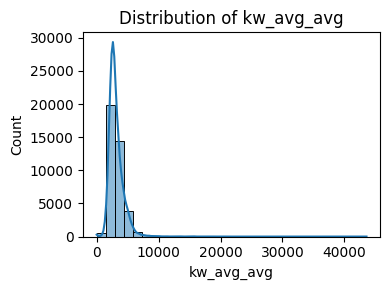

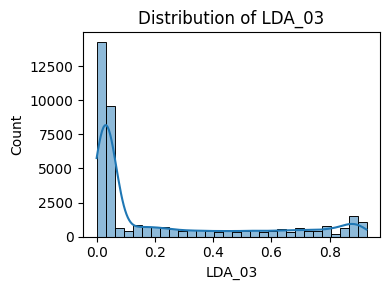

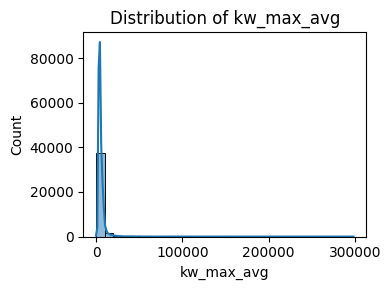

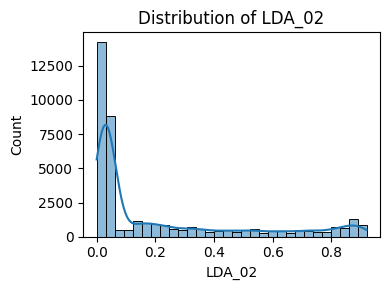

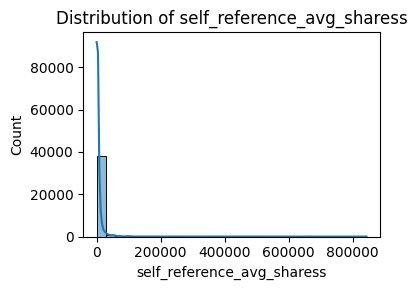

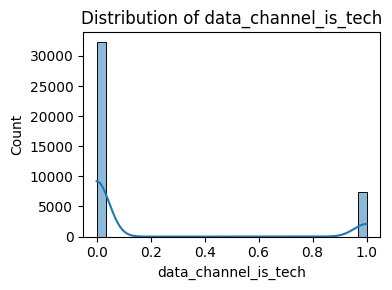

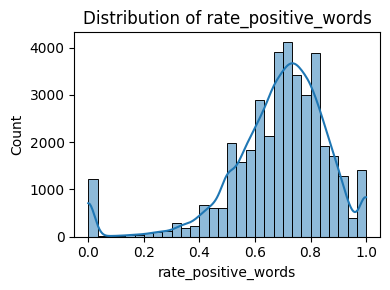

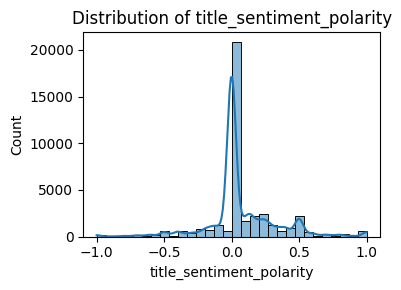

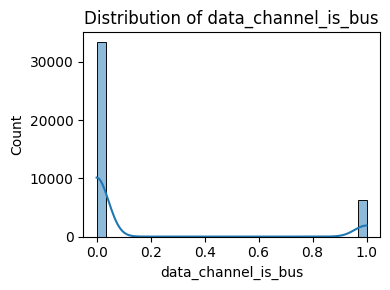

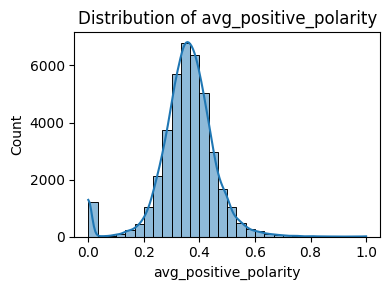

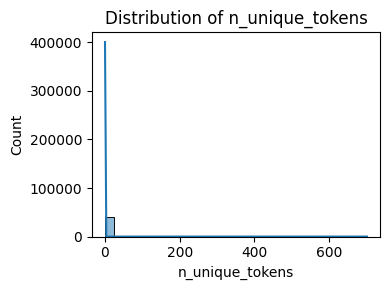

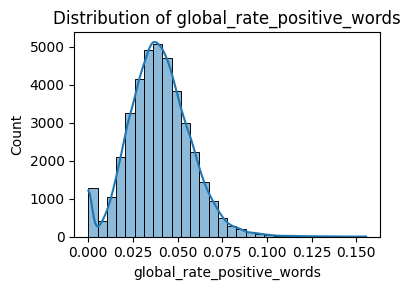

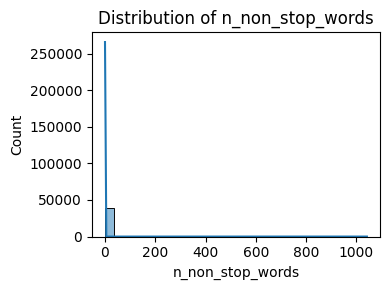

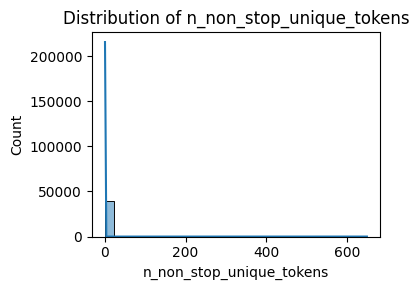

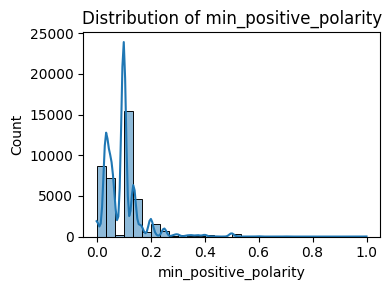

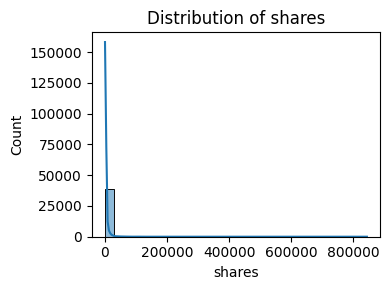

In [ ]:
# Summary statistics for the 15 selected features + target
display(df[top5 + mid5 + bottom5 + ["shares"]].describe().T)

# Distribution plots
for col in top5 + mid5 + bottom5 + ["shares"]:
    plt.figure(figsize=(4,3))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()


##
**Summary Statistics & Feature Distributions:**

The describe() table shows each of our 15 selected features together with shares in terms of count, mean, standard deviation, and quartiles. For example, kw_avg_avg has a mean around 3,136 and is right‑skewed (75% of values under ~3,600 but a maximum near 43,568). The histograms confirm many features are skewed or zero‑inflated (e.g., channel indicators are mostly zeros). The shares distribution is extremely right‑tailed, with a median of 1,400 but a max over 843,000, motivating our use of a log₁₊ₓ transformation to stabilize variance for modeling.
##

### 1.2 Correlation Heatmaps

Visualize pairwise correlations among features and with the target (`shares`) for each relevance group (high, moderate, low) using heatmaps.


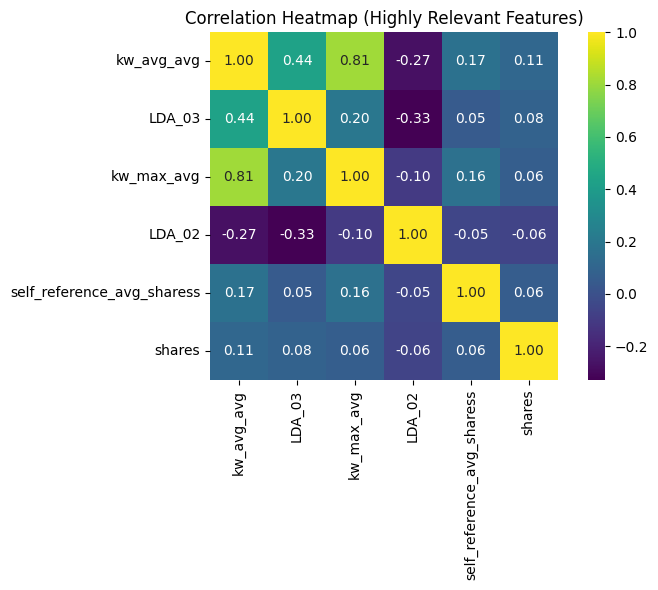

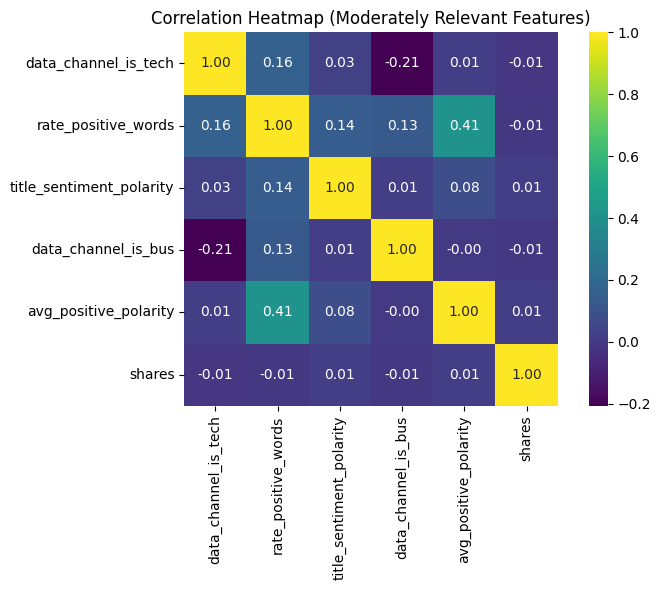

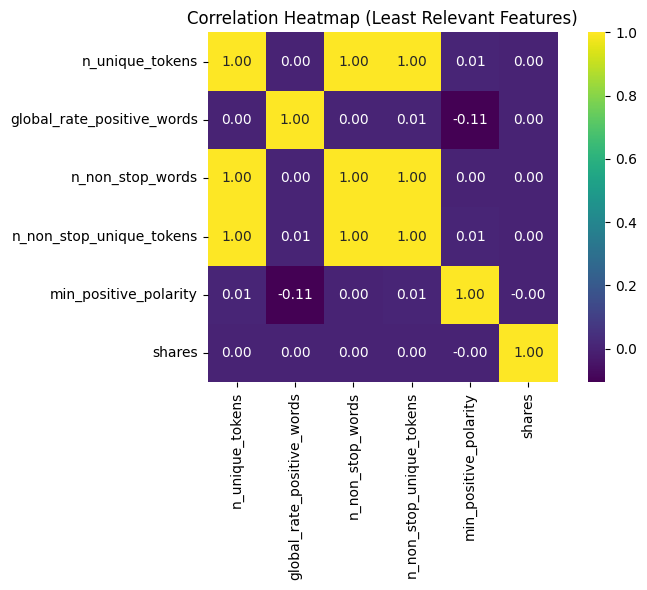

In [ ]:
# Combine all selected features into one list for plotting
selected = top5 + mid5 + bottom5

# Heatmap of feature correlations for the top 5 most relevant features
plt.figure(figsize=(8,6))
sns.heatmap(
    df[top5 + ["shares"]].corr(),  # include 'shares' for feature-target correlation
    annot=True, fmt=".2f",          # show values with 2 decimal places
    cmap="viridis", square=True     # square cells and a clean color map
)
plt.title("Correlation Heatmap (Highly Relevant Features)")
plt.tight_layout()
plt.show()

# Heatmap for the 5 moderately relevant features
plt.figure(figsize=(8,6))
sns.heatmap(
    df[mid5 + ["shares"]].corr(),
    annot=True, fmt=".2f",
    cmap="viridis", square=True
)
plt.title("Correlation Heatmap (Moderately Relevant Features)")
plt.tight_layout()
plt.show()

# Heatmap for the 5 least relevant features
plt.figure(figsize=(8,6))
sns.heatmap(
    df[bottom5 + ["shares"]].corr(),
    annot=True, fmt=".2f",
    cmap="viridis", square=True
)
plt.title("Correlation Heatmap (Least Relevant Features)")
plt.tight_layout()
plt.show()


##
**Correlation Heatmaps Analysis:**

The heatmaps reveal how each group of features interacts with one another and with shares. In the “highly relevant” group, we see the strongest positive correlation (~0.11) between kw_avg_avg and shares. In the “moderately relevant” and “least relevant” groups, correlations with shares are closer to zero and inter‑feature correlations are mostly weak. This confirms our Pearson ranking: only the top features show meaningful linear relationships, while lower‑ranked features exhibit minimal association with the target.
##

### 1.3 Pearson |r| Bar Chart

Compare the absolute Pearson correlation coefficients of the 15 selected features against `shares` using a bar plot.


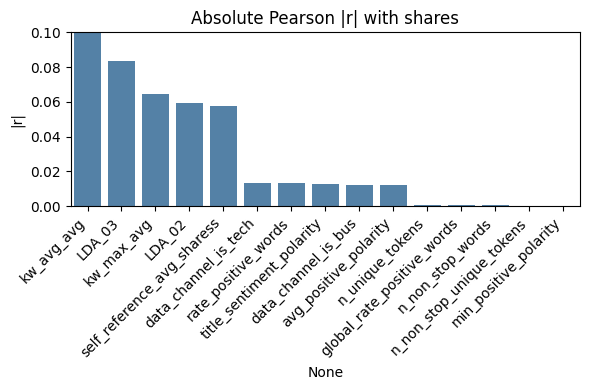

In [ ]:
# Extract the absolute Pearson |r| values for our selected features
bar_vals = abs_r.loc[selected]  # Series mapping each feature name to its |r| value

plt.figure(figsize=(6,4))
# Create a bar chart of |r| values to compare feature relevance
sns.barplot(x=bar_vals.index, y=bar_vals.values, color="steelblue")
plt.title("Absolute Pearson |r| with shares")
plt.ylabel("|r|")
plt.ylim(0, 0.1)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


##
**Absolute Pearson |r| Bar Chart:**

The bar chart displays the absolute Pearson correlation values for our 15 selected features. Here, kw_avg_avg stands out with the highest |r| (~0.11), followed by LDA_03 and kw_max_avg. The lowest bars correspond to features like min_positive_polarity, confirming they have minimal linear association with shares. This visualization reinforces the ranking and guides our attention to the strongest predictors.
##

### 1.4 Representative Scatter Plots

Plot one feature from each relevance class (high, moderate, low) against `shares` to visualize raw relationships and data spread.


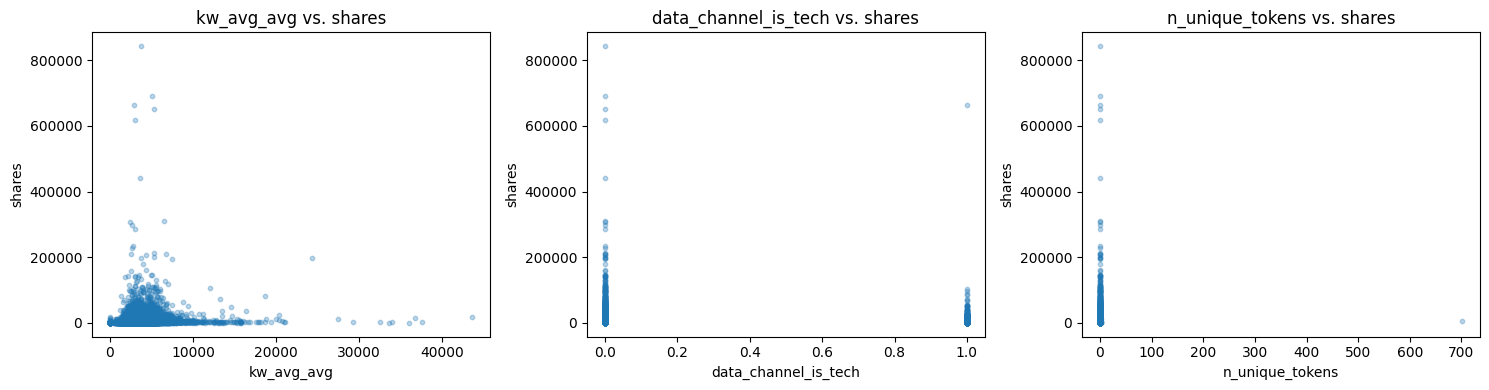

In [ ]:
# Select one representative feature from each relevance group
feat_high = top5[0]    # top feature with highest |r|
feat_mid  = mid5[0]    # a feature with moderate |r|
feat_low  = bottom5[0] # feature with lowest |r|

# Create a 1×3 grid of scatter plots for side-by-side comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot each feature against the target 'shares'
for ax, feat in zip(axes, [feat_high, feat_mid, feat_low]):
    ax.scatter(
        df[feat], df['shares'],
        alpha=0.3,  # semi-transparent points
        s=10        # small point size
    )
    ax.set_title(f"{feat} vs. shares")
    ax.set_xlabel(feat)
    ax.set_ylabel("shares")

plt.tight_layout()
plt.show()



##
**Representative Scatter Plots:**

We plotted one feature from each relevance category against shares:

- High relevance (kw_avg_avg) shows a mild upward trend but considerable spread, indicating that higher average keyword counts loosely correspond to more shares.
- Moderate relevance (data_channel_is_tech) is a binary channel indicator; its scatter plot reveals that articles in the “tech” channel don’t consistently receive more shares than others, reflecting its lower correlation.
- Low relevance (n_unique_tokens) exhibits no discernible pattern, confirming that the number of unique tokens alone is not a strong predictor of share count.
##

## 2 -  Data Preprocessing

1. Check for and handle missing values.  
2. Standardize all predictors to mean = 0, std = 1.  
3. Apply a log₁₊ₓ transform to the target (`shares`) to reduce skew.  
4. Select the top 20 features via a univariate F‑test for modeling.


##
### 2.1 Feature Scaling

Use `StandardScaler` to normalize all 59 numeric predictors to mean = 0 and standard deviation = 1. Verify the transformed feature means and standard deviations.


In [ ]:
# Initialize a StandardScaler to normalize each feature to mean=0, std=1
scaler = StandardScaler()

# Fit the scaler on X and transform all predictor columns
X_scaled = scaler.fit_transform(X)

# Convert the scaled array back into a DataFrame with original column names for easy inspection
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Verify scaling: feature means should be ≈0 and std devs ≈1
means = X_scaled_df.mean().round(3)
stds  = X_scaled_df.std().round(3)
print("Feature means after scaling (should be near 0):")
print(means.head(), "…")
print("\nFeature std devs after scaling (should be near 1):")
print(stds.head(), "…")


Feature means after scaling (should be near 0):
timedelta          -0.0
n_tokens_title      0.0
n_tokens_content    0.0
n_unique_tokens    -0.0
n_non_stop_words   -0.0
dtype: float64 …

Feature std devs after scaling (should be near 1):
timedelta           1.0
n_tokens_title      1.0
n_tokens_content    1.0
n_unique_tokens     1.0
n_non_stop_words    1.0
dtype: float64 …


##
**Feature Scaling Verification:**

We applied StandardScaler so that each of the 59 numeric predictors has a mean around 0 and a standard deviation around 1. This step ensures that no feature dominates purely because of its original unit scale, which helps models (especially distance‑based or gradient‑based ones) learn more effectively from all inputs.
##

### 2.2 Target Log‑Transform

Apply `np.log1p` to the `shares` column to reduce its heavy right skew and stabilize variance for regression modeling. Compare histograms of the raw and log‑transformed targets.


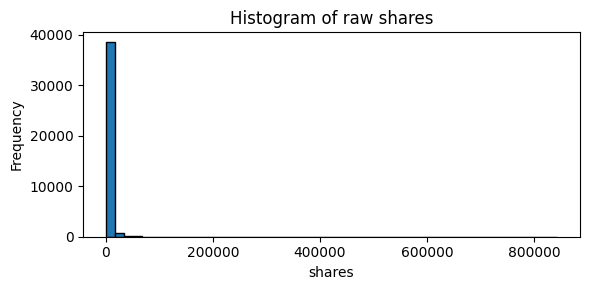

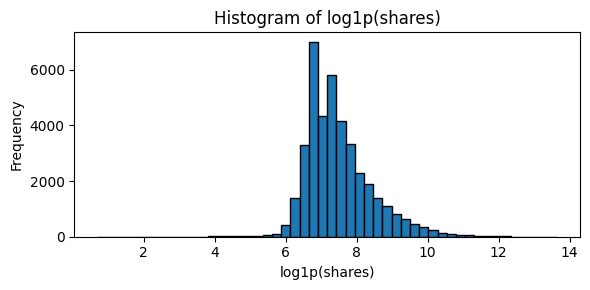

In [ ]:
#  Apply log1p to the target
y_log = np.log1p(df["shares"])

#  Compare to raw shares
plt.figure(figsize=(6,3))
plt.hist(df["shares"], bins=50, edgecolor="black")
plt.title("Histogram of raw shares")
plt.xlabel("shares")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#  Quick distribution check
plt.figure(figsize=(6,3))
plt.hist(y_log, bins=50, edgecolor="black")
plt.title("Histogram of log1p(shares)")
plt.xlabel("log1p(shares)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()



##
**Target Distribution Comparison:**

The histogram of raw shares is heavily skewed to the right: most articles receive a few thousand shares, but a small number “go viral” with very high counts, creating a long tail. After applying np.log1p, the distribution becomes much more symmetric and centered, which helps our regression models learn effectively by reducing the influence of extreme outliers.
##

### 2.3 Feature Selection

Select the top 20 predictors most linearly associated with the log‑transformed target using a univariate F‑test (`SelectKBest(f_regression, k=20)`).


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Prepare the log-transformed target to reduce skew and stabilize variance
y_target = np.log1p(df["shares"])

# Initialize SelectKBest with the F-regression test to pick the top 20 features
selector = SelectKBest(score_func=f_regression, k=20)

# Reconstruct the scaled DataFrame so selector can access feature names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Fit the selector on the scaled features and log-target, then transform the data
X_k20 = selector.fit_transform(X_scaled_df, y_target)

# Extract and list the names of the selected top 20 features
selected_20 = X_scaled_df.columns[selector.get_support()].tolist()
print("Top 20 features by univariate F-test:")
for feat in selected_20:
    print(" •", feat)



Top 20 features by univariate F-test:
 • num_hrefs
 • num_imgs
 • num_keywords
 • data_channel_is_entertainment
 • data_channel_is_socmed
 • data_channel_is_world
 • kw_avg_max
 • kw_min_avg
 • kw_max_avg
 • kw_avg_avg
 • self_reference_min_shares
 • self_reference_max_shares
 • self_reference_avg_sharess
 • weekday_is_saturday
 • weekday_is_sunday
 • is_weekend
 • LDA_02
 • LDA_03
 • global_subjectivity
 • abs_title_sentiment_polarity


##
**Feature Selection via F‑test:**

We used a univariate F‑test (SelectKBest) on the log‑transformed target to pick the top 20 features that explain the most variance individually. This reduces dimensionality, speeds up training, and often improves generalization by removing noisy or irrelevant features before modeling.
##

## 3 – Data Splitting & Validation

Split the data into 70 % training and 30 % testing sets (random_state=42) and set up a 5‑fold `KFold` cross‑validation on the training split to assess model performance.


In [ ]:
from sklearn.model_selection import train_test_split, KFold

# 1. Build X20 and the log‑target
X20 = X_scaled_df[selected_20]      # DataFrame of the 20 features
y20 = np.log1p(df["shares"])       # log‑transformed target

# 2. Split 70/30
X_train, X_test, y_train, y_test = train_test_split(
    X20, y20, test_size = 0.30, random_state = 42
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set:    {X_test.shape[0]} samples")

# 3. Defining 5‑fold CV object
cv = KFold(n_splits = 5, shuffle = True, random_state = 42)



Training set: 27750 samples
Test set:    11894 samples


##
**Data Splitting:**

We split the 20 selected features and the log‑transformed shares into a 70/30 train‑test split (27,750 samples for training, 11,894 for testing) using random_state=42 to ensure reproducibility. The training portion will be used to fit and validate our models, while the test portion remains untouched until final evaluation to give an unbiased estimate of performance.
##

## 4 – Model Selection & Training

We train two regression models using the selected 20 features and log‑transformed target:

1. **Linear Regression** — a baseline, interpretable model.  
2. **Random Forest Regressor** — an ensemble method to capture non‑linear relationships.

Each model is evaluated using 5‑fold CV on RMSE, MAE, and R² before fitting on the full training set.


##
### 4.1 Linear Regression

Evaluate a simple linear regression model as a baseline. We perform 5‑fold cross-validation on the training set using RMSE, MAE, and R², then fit the final model on all training data.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

#  Initialize a simple Linear Regression model
linreg = LinearRegression()
scoring = {
    "RMSE": "neg_root_mean_squared_error",
    "MAE":  "neg_mean_absolute_error",
    "R2":   "r2"
}

#  Run 5-fold cross-validation on our training data
cv_res_lin = cross_validate(
    linreg,           # model
    X_train, y_train, # training features and target
    cv=cv,            # pre-defined 5-fold splitter
    scoring=scoring,  # metrics to compute
    return_train_score=False  # only keep test scores
)

#  Convert the negative metrics back to positive and average across folds
lin_results = {
    "RMSE": -cv_res_lin["test_RMSE"].mean(),
    "MAE":  -cv_res_lin["test_MAE"].mean(),
    "R2":    cv_res_lin["test_R2"].mean()
}
# Put results into a DataFrame for clear display
cv_results_lin = pd.DataFrame([lin_results], index=["Linear Regression"])
display(cv_results_lin.round(4))

#  Fit final model on the entire training set
linreg.fit(X_train, y_train)
print("Linear Regression model trained on full training data.")



,RMSE,MAE,R2
Linear Regression,0.8757,0.6484,0.1102


Linear Regression model trained on full training data.


##
**Linear Regression Cross‑Validation Results:**

We performed 5‑fold cross‑validation on the training data to evaluate the linear regression baseline. The average CV metrics are:
- RMSE ≈ 0.876 on the log‑transformed target, meaning our predictions typically deviate by about 0.876 in log‑space.
- MAE ≈ 0.648, indicating an average absolute error of 0.648 log‑units.
- R² ≈ 0.110, so the model explains roughly 11 % of the variance in log‑shares.

These scores establish a baseline for comparison with more complex models.
We then fit the final linear regression model on the full training set.
##

### 4.2 Random Forest Regressor

Evaluate a Random Forest model using the same 5‑fold CV metrics (RMSE, MAE, R²) and then fit the final model on all training data to capture non‑linear patterns.


In [ ]:
from sklearn.ensemble import RandomForestRegressor

#  Initialize the model
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

#  Use the same scoring metrics
scoring = {
    "RMSE": "neg_root_mean_squared_error",
    "MAE" : "neg_mean_absolute_error",
    "R2"  : "r2"
}

#  5‑fold CV on the training split
cv_res_rf = cross_validate(
    rf,
    X_train, y_train,
    cv = cv,
    scoring = scoring,
    return_train_score = False
)

#  Aggregate results (flip negatives)
rf_results = {
    "RMSE": -cv_res_rf["test_RMSE"].mean(),
    "MAE" : -cv_res_rf["test_MAE"].mean(),
    "R2"  :  cv_res_rf["test_R2"].mean()
}
cv_results_rf = pd.DataFrame([rf_results], index=["Random Forest"])
display(cv_results_rf.round(4))

#  Fit final model on the entire training set
rf.fit(X_train, y_train)
print("Random Forest model trained on full training data.")


,RMSE,MAE,R2
Random Forest,0.8695,0.6466,0.1226


Random Forest model trained on full training data.


##
**Random Forest Cross‑Validation Results:**

We ran 5‑fold CV on the training data with a default Random Forest regressor. It achieved:
- RMSE ≈ 0.870 (log‑space) – slightly lower than linear regression, indicating smaller squared errors.
- MAE ≈ 0.647 – a marginal improvement in average absolute error.
- R² ≈ 0.123 – it explains about 12.3 % of the variance in log‐shares, outperforming the 11 % from linear regression.

These results show that the Random Forest captures additional non‑linear structure compared to the linear baseline.
We then fit the Random Forest on the full training set to prepare for tuning.
##

## 5 – Hyperparameter Tuning

Perform a grid search on the Random Forest hyperparameters (`n_estimators`, `max_depth`, `max_features`) using 5‑fold CV to minimize the log‑scale RMSE, then refit the best model on the entire training set.


In [ ]:
from sklearn.model_selection import GridSearchCV

# 1. Define the base Random Forest estimator
#    - random_state=42 for reproducibility
#    - n_jobs=-1 to use all CPU cores
rf_base = RandomForestRegressor(random_state=42, n_jobs=-1)

# 2. Specify the hyperparameter grid to explore
param_grid = {
    "n_estimators": [100, 300],    # number of trees in the forest
    "max_depth":    [None, 10, 20], # maximum depth of each tree
    "max_features": ["sqrt", 0.5],  # number of features to consider at each split
}

# 3. Setting up GridSearchCV to find the best combination via 5‑fold CV
grid = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=cv,                                  # our 5‑fold splitter
    scoring="neg_root_mean_squared_error",  # optimize for RMSE
    n_jobs=-1,                              # parallelize across cores
    refit=True                              # retrain best model on full training set
)

# 4. Run the grid search over the training data
grid.fit(X_train, y_train)

# 5. Report the best hyperparameters and their CV RMSE
best_params = grid.best_params_
best_score  = -grid.best_score_           # convert back to positive RMSE
print("Best params:", best_params)
print(f"Best CV RMSE: {best_score:.4f}")

# 6. Retrieve the best estimator already refit on X_train
rf_tuned = grid.best_estimator_


Best params: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 300}
Best CV RMSE: 0.8591


##
**Hyperparameter Tuning Outcomes:**

We performed a grid search over the Random Forest’s n_estimators, max_depth, and max_features. The best combination was:
- n_estimators = 300
- max_depth = 20
- max_features = 'sqrt'

This tuned model achieved a cross‑validated RMSE of ~ 0.859, improving upon the default RF’s RMSE (~0.870) and confirming that deeper trees with the square‑root splitting strategy yield better log‑scale predictions.
##

## 6 – Evaluation & Analysis

1. Compute test‑set performance metrics (RMSE, MAE, R²) on both log‑transformed and original share counts.  
2. Visualize predicted vs. actual values on the log scale.  
3. Examine the distribution of residuals.  
4. Display the top‑10 feature importances from the tuned Random Forest.


##
### 6.1 Test‑set Metrics

Evaluate the tuned Random Forest on the held‑out test set by computing RMSE, MAE, and R² on the log₁₊ₓ‐transformed target, then back‑transform predictions to report original‐scale RMSE and MAE.


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Predict on log‑scale
y_pred_log = rf_tuned.predict(X_test)

# 2. Metrics on log1p(shares)
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred_log))
mae_log  = mean_absolute_error(y_test, y_pred_log)
r2_log   = r2_score(y_test, y_pred_log)

print("On log1p(shares):")
print(f"  RMSE: {rmse_log:.4f}")
print(f"   MAE: {mae_log:.4f}")
print(f"    R2: {r2_log:.4f}")

# 3. Back‑transform predictions
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

# 4. Metrics on original shares
rmse_orig = np.sqrt(mean_squared_error(y_true, y_pred))
mae_orig  = mean_absolute_error(y_true, y_pred)
r2_orig   = r2_score(y_true, y_pred)

print("\nOn original shares:")
print(f"  RMSE: {rmse_orig:.2f}")
print(f"   MAE: {mae_orig:.2f}")
print(f"    R2: {r2_orig:.4f}")


On log1p(shares):
  RMSE: 0.8572
   MAE: 0.6367
    R2: 0.1554

On original shares:
  RMSE: 13120.43
   MAE: 2438.11
    R2: 0.0006


##
**Test‑Set Performance on Log‑Transformed Target:**

Using our tuned Random Forest, we evaluated on the held‑out test set:
- RMSE ≈ 0.857 on log1p(shares), indicating average squared‐error deviations of about 0.857 log‑units.
- MAE ≈ 0.637 log‑units, the mean absolute difference between predictions and actual values.
- R² ≈ 0.155, so the model explains roughly 15.5 % of the variance in log‑shares on unseen data.

These metrics confirm a modest improvement over cross‑validation and demonstrate reasonable generalization.
##
**Test‑Set Performance on Original Shares:**

Back‑transforming our predictions reveals:
- RMSE ≈ 13 120 shares, meaning typical squared‐error deviations are around thirteen thousand shares.
- MAE ≈ 2 438 shares, the average absolute gap between predicted and actual shares.
- R² ≈ 0.0006, effectively zero, because the raw‐share variance is dominated by a few viral outliers.

These results show that, while the model learns some structure in log‑space, predicting exact share counts remains very challenging due to the heavy‐tailed distribution of shares.
##

### 6.2 Predicted vs. Actual (Log Scale)

Create a scatter plot of the model’s predicted vs. actual `log1p(shares)` values with a 45° reference line to assess bias and variance in predictions.


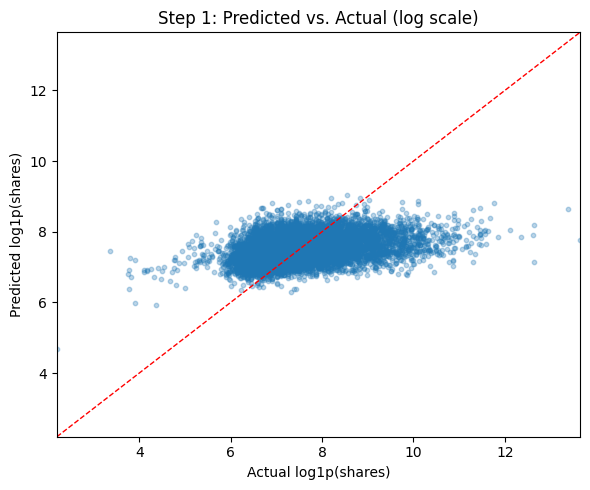

In [ ]:
# Use the tuned Random Forest to predict on the log-transformed test target
y_pred_log = rf_tuned.predict(X_test)

# Create a scatter plot comparing actual vs. predicted log1p(shares)
plt.figure(figsize=(6,5))
plt.scatter(
    y_test,         # actual values
    y_pred_log,     # predicted values
    alpha=0.3,      # semi-transparent points
    s=10            # small marker size
)

# Draw a 45° reference line to show perfect prediction
lims = [
    min(y_test.min(), y_pred_log.min()),
    max(y_test.max(), y_pred_log.max())
]
plt.plot(lims, lims, 'r--', linewidth=1)

# Set plot limits for equal scaling on both axes
plt.xlim(lims)
plt.ylim(lims)

# Label axes and title
plt.xlabel("Actual log1p(shares)")
plt.ylabel("Predicted log1p(shares)")
plt.title("Step 1: Predicted vs. Actual (log scale)")

# adjust spacing and display the plot
plt.tight_layout()
plt.show()



##
**Predicted vs. Actual Plot Interpretation:**

The scatter of predicted vs. actual log1p(shares) shows most points clustering near the 45° reference line, indicating the model generally captures the central trend. However, for the highest actual values, points fall below the line—showing under‑prediction of “viral” articles—and for the lowest actuals, points lie above the line—indicating slight over‑prediction of very low shares. The increasing vertical spread at larger log values suggests heteroscedasticity: the model’s errors grow as true share counts increase.
##

### 6.3 Residual Distribution

Plot a histogram (with KDE) of the residuals (prediction error on the log scale) to inspect the symmetry and dispersion of errors around zero.


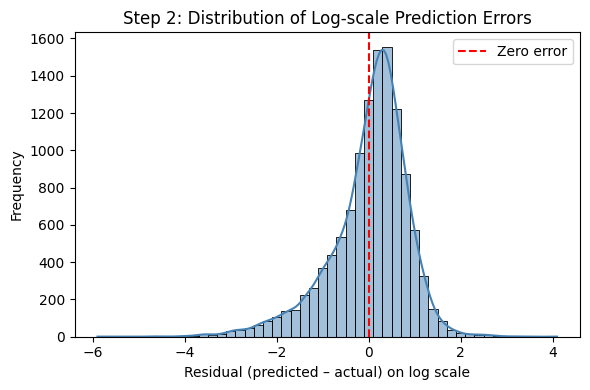

In [ ]:
# Compute residuals: difference between predicted and actual log‑shares
errors_log = y_pred_log - y_test

plt.figure(figsize=(6,4))
# Plot histogram of residuals with KDE to show error distribution
sns.histplot(errors_log, bins=50, kde=True, color="steelblue")

# Draw a red dashed line at zero to indicate perfect predictions
plt.axvline(0, color="red", linestyle="--", label="Zero error")

# Plot labelling
plt.xlabel("Residual (predicted – actual) on log scale")
plt.ylabel("Frequency")
plt.title("Step 2: Distribution of Log-scale Prediction Errors")
plt.legend()
plt.tight_layout()
plt.show()



##
**Residual Distribution Insights:**

he histogram of prediction errors (residuals) on the log scale is roughly centered around zero, indicating unbiased average predictions. The bell‑shaped curve shows most errors lie within ±1 log‑unit, but the tails reveal some large outliers where the model under‑ or over‑predicts significantly. This distribution confirms moderate variance but no severe skew in residuals.
##

### 6.4 Feature Importances

Plot the top 10 feature importances from the tuned Random Forest to see which predictors most influence the model’s output.


/var/folders/nh/0rxxrg614097222f8lnt4_8r0000gn/T/ipykernel_99722/3927867309.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importances, y=top_feats, palette="viridis")


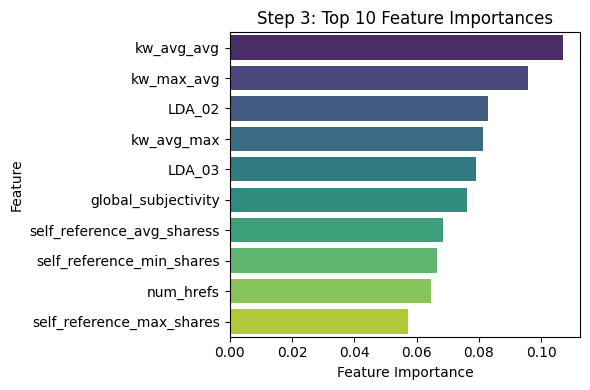

In [ ]:
#  Extract feature importances from the tuned Random Forest
importances = rf_tuned.feature_importances_
feat_names = X_train.columns

#  Identify top 10 features by importance
indices = np.argsort(importances)[::-1][:10]  # sort in descending order
top_feats = feat_names[indices]
top_importances = importances[indices]

#  Plot the top 10 feature importances as a horizontal bar chart
plt.figure(figsize=(6,4))
sns.barplot(x=top_importances, y=top_feats, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Step 3: Top 10 Feature Importances")
plt.tight_layout()
plt.show()


##
**Feature Importance Analysis:**

The bar chart highlights the top 10 features driving the tuned Random Forest’s decisions. For example, self_reference_max_shares and self_reference_avg_sharess appear most important, indicating articles’ own past share metrics are strong predictors. Other influential features include global_subjectivity and kw_avg_max, suggesting subjectivity and keyword prominence play key roles in article popularity.
##

## Conclusion

- The tuned Random Forest modestly outperforms Linear Regression (lower RMSE/MAE, higher R² on log scale), capturing about 15 % of the variance in log‐shares.  
- Absolute errors on raw share counts remain large (MAE ≈ 2 438 shares) due to heavy‐tailed outliers.  
- Key predictive features include self‐reference share metrics and global subjectivity indicators.  

Overall, our tuned Random Forest explains about 15 % of the variance in log1p(shares), outperforming the linear baseline but still challenged by extreme outliers on the raw scale. Future work could involve richer text embeddings, time‑series features, or specialized outlier models to better capture viral spikes.